
 Importing the required libraries for EDA


In [ ]:
# Project Title - Blood Prediction by State
# Gruop I
# Muhammad Muhaimin Bin Mazni (1917)
# Muhammad Faris Bin Musa (2013259)

# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Loading the data into the data frame

In [ ]:

df= pd.read_csv("State_BD.csv")

# Display the top 5 rows
df.head(5)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,1/1/2006,Johor,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2/1/2006,Johor,15,4,3,6,2,15,0,15,0,0,0,15,0,0,4,11,0
2,3/1/2006,Johor,8,2,2,4,0,8,0,8,0,0,0,8,0,0,2,5,1
3,4/1/2006,Johor,33,7,11,12,3,33,0,33,0,0,0,32,0,1,25,8,0
4,5/1/2006,Johor,20,3,8,8,1,20,0,20,0,0,0,17,3,0,16,3,1


In [ ]:
# Display the bottom 5 rows
df.tail(5)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
79997,2/11/2022,W.P. Kuala Lumpur,407,100,125,175,7,87,320,380,11,16,0,380,23,4,52,242,113
79998,3/11/2022,W.P. Kuala Lumpur,368,98,117,148,5,89,279,345,10,13,0,349,19,0,51,248,69
79999,4/11/2022,W.P. Kuala Lumpur,242,62,65,106,8,123,119,212,14,16,0,191,45,6,37,171,34
80000,5/11/2022,W.P. Kuala Lumpur,817,212,243,340,22,140,677,787,19,11,0,604,205,8,199,465,153
80001,6/11/2022,W.P. Kuala Lumpur,1004,248,255,475,26,140,864,1004,0,0,0,811,186,7,293,500,211


 Checking the types of data

In [ ]:
df.dtypes

date                       object
state                      object
daily                       int64
blood_a                     int64
blood_b                     int64
blood_o                     int64
blood_ab                    int64
location_centre             int64
location_mobile             int64
type_wholeblood             int64
type_apheresis_platelet     int64
type_apheresis_plasma       int64
type_other                  int64
social_civilian             int64
social_student              int64
social_policearmy           int64
donations_new               int64
donations_regular           int64
donations_irregular         int64
dtype: object

Dropping irrelevant columns

In [ ]:
df = df.drop(['donations_regular', 'donations_new','date','location_centre', 'location_mobile','type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other', 'social_civilian', 'social_student', 'social_policearmy', 'donations_irregular'], axis=1)
df.head(5)

,state,daily,blood_a,blood_b,blood_o,blood_ab
0,Johor,87,19,20,45,3
1,Johor,15,4,3,6,2
2,Johor,8,2,2,4,0
3,Johor,33,7,11,12,3
4,Johor,20,3,8,8,1


In [ ]:
df.shape

(80002, 6)

Dropping the duplicate rows

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicates row:", duplicate_rows_df.shape)

number of duplicates row: (17332, 6)


In [ ]:
# Count the number of rows
df.count

<bound method DataFrame.count of                    state  daily  blood_a  blood_b  blood_o  blood_ab
0                  Johor     87       19       20       45         3
1                  Johor     15        4        3        6         2
2                  Johor      8        2        2        4         0
3                  Johor     33        7       11       12         3
4                  Johor     20        3        8        8         1
...                  ...    ...      ...      ...      ...       ...
79997  W.P. Kuala Lumpur    407      100      125      175         7
79998  W.P. Kuala Lumpur    368       98      117      148         5
79999  W.P. Kuala Lumpur    242       62       65      106         8
80000  W.P. Kuala Lumpur    817      212      243      340        22
80001  W.P. Kuala Lumpur   1004      248      255      475        26

[80002 rows x 6 columns]>

In [ ]:
df = df.drop_duplicates()
df.head(5)

,state,daily,blood_a,blood_b,blood_o,blood_ab
0,Johor,87,19,20,45,3
1,Johor,15,4,3,6,2
2,Johor,8,2,2,4,0
3,Johor,33,7,11,12,3
4,Johor,20,3,8,8,1


In [ ]:
df.count()

state       62670
daily       62670
blood_a     62670
blood_b     62670
blood_o     62670
blood_ab    62670
dtype: int64

Dropping the missing or null values.

In [ ]:
print(df.isnull().sum())

state       0
daily       0
blood_a     0
blood_b     0
blood_o     0
blood_ab    0
dtype: int64


In [ ]:
# Dropping the missing values.
df = df.dropna()
df.count()

state       62670
daily       62670
blood_a     62670
blood_b     62670
blood_o     62670
blood_ab    62670
dtype: int64

In [ ]:
 # After dropping the values
print(df.isnull().sum())

state       0
daily       0
blood_a     0
blood_b     0
blood_o     0
blood_ab    0
dtype: int64


 Detecting Outliers

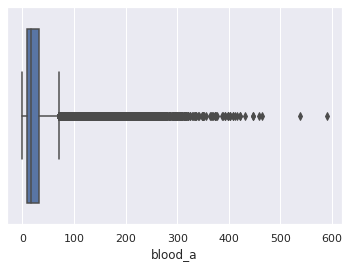

In [ ]:
sns.boxplot(x=df['blood_a'])

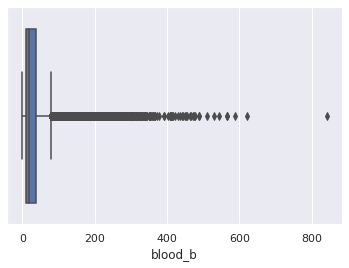

In [ ]:
sns.boxplot(x=df['blood_b'])

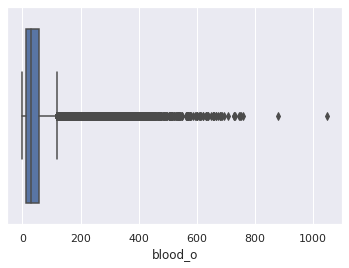

In [ ]:
sns.boxplot(x=df['blood_o'])

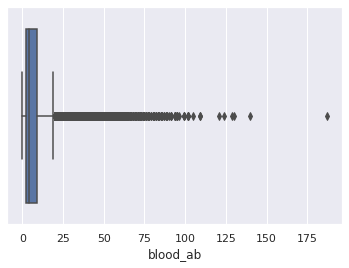

In [ ]:
sns.boxplot(x=df['blood_ab'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

daily       98.0
blood_a     25.0
blood_b     28.0
blood_o     42.0
blood_ab     7.0
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-57-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(55544, 6)

Plot different features against one another (scatter), against
frequency (histogram)

Heat Maps

,daily,blood_a,blood_b,blood_o,blood_ab
daily,1.000000,0.959102,0.961136,0.975679,0.827504
blood_a,0.959102,1.000000,0.897880,0.905733,0.777772
blood_b,0.961136,0.897880,1.000000,0.903205,0.785168
blood_o,0.975679,0.905733,0.903205,1.000000,0.769037
blood_ab,0.827504,0.777772,0.785168,0.769037,1.000000


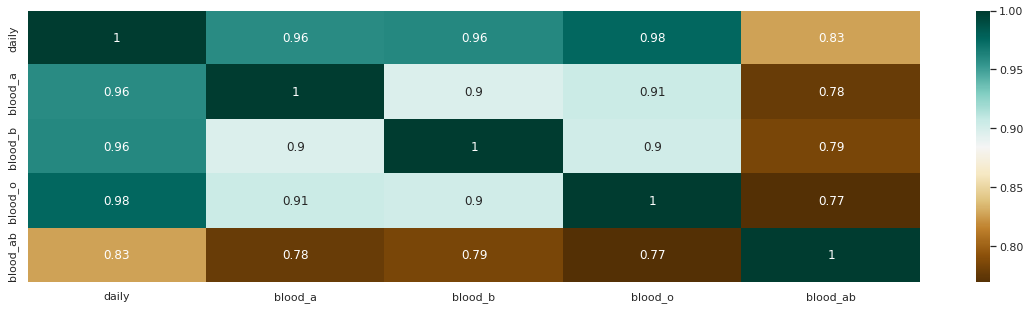

In [ ]:
plt.figure(figsize=(20,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Histogram

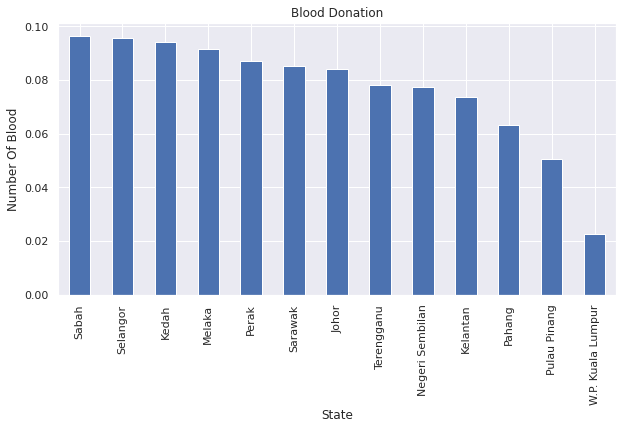

In [ ]:
df.state.value_counts(50).nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Blood Donation")
plt.ylabel('Number Of Blood')
plt.xlabel('State');

Scatterplot

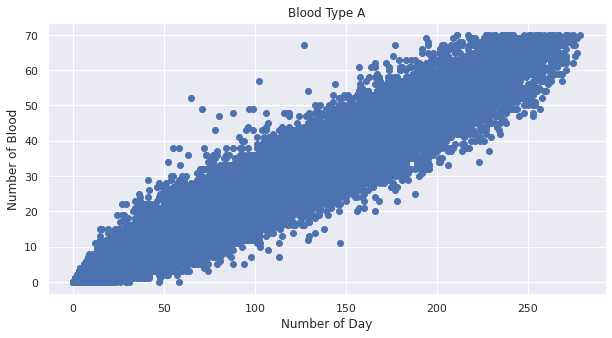

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['daily'], df['blood_a'])
ax.set_title('Blood Type A')
ax.set_xlabel('Number of Day')
ax.set_ylabel('Number of Blood')
plt.show()

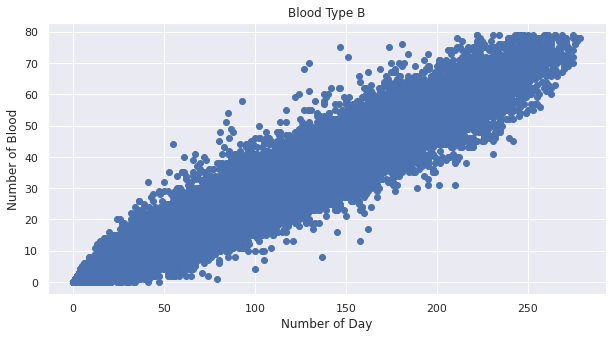

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['daily'], df['blood_b'])
ax.set_title('Blood Type B')
ax.set_xlabel('Number of Day')
ax.set_ylabel('Number of Blood')
plt.show()

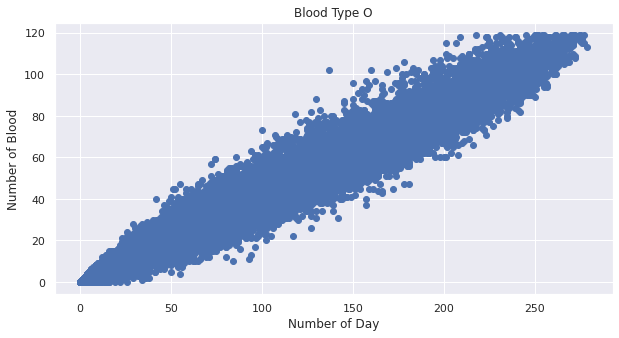

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['daily'], df['blood_o'])
ax.set_title('Blood Type O')
ax.set_xlabel('Number of Day')
ax.set_ylabel('Number of Blood')
plt.show()

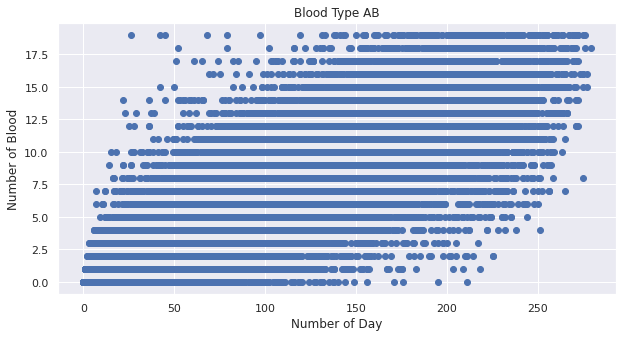

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['daily'], df['blood_ab'])
ax.set_title('Blood Type AB') 
ax.set_xlabel('Number of Day') 
ax.set_ylabel('Number of Blood') 
plt.show()

**NN**

In [ ]:
df.head()

,state,daily,blood_a,blood_b,blood_o,blood_ab
0,Johor,87,19,20,45,3
1,Johor,15,4,3,6,2
2,Johor,8,2,2,4,0
3,Johor,33,7,11,12,3
4,Johor,20,3,8,8,1


Implementing neural network with Scikit-Learn

In [ ]:
# drop daily from table
df = df.drop(['daily'], axis=1)
df.head(5)

,state,blood_a,blood_b,blood_o,blood_ab
0,Johor,19,20,45,3
1,Johor,4,3,6,2
2,Johor,2,2,4,0
3,Johor,7,11,12,3
4,Johor,3,8,8,1


In [ ]:
# Assign data from second four columns to x variables
x = df.iloc[:, 1:4]

# Assign data to y variables
y = df.select_dtypes(include=[object])

In [ ]:
y.head(5)

,state
0,Johor
1,Johor
2,Johor
3,Johor
4,Johor


In [ ]:
y.tail(5)

,state
79808,W.P. Kuala Lumpur
79814,W.P. Kuala Lumpur
79876,W.P. Kuala Lumpur
79996,W.P. Kuala Lumpur
79999,W.P. Kuala Lumpur


In [ ]:
y.state.unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor',
       'Terengganu', 'W.P. Kuala Lumpur'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)
y.state.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Train, test & split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Training and predicitons

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

Making Predictions

In [ ]:
predictions = mlp.predict(x_test)



```
# This is formatted as code
```

Evaluating the algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  6 143 103 119   0  44  47   0 215  57  65  64  39]
 [  8 361  82 127   0  22  70   0 136  56  82  56  56]
 [  0  30 307  34   0  44   5   0 154  52  44  84   1]
 [ 12 189 126 173   1  43  45   0 211  46  83  80  25]
 [  0  69 170  77   0  53  41   0 197  47  86  90   1]
 [  0  58 186  60   1  71  26   0 112  53  66  96   2]
 [  8 224  65 142   1  21  71   0 174  34  84  67  34]
 [ 10 145  40  91   0   2  35   0 120  29  55  30  25]
 [ 10  46 102  82   1  28  19   0 680  37  56  36   7]
 [  5 158 146  73   1  32  48   0 190 111  96  96  15]
 [  7 121 175 116   0  41  59   0 241  87 124 107  12]
 [  0 132 194  59   0  57  36   0 151  81  86 106   1]
 [  7  68   1  32   0   0   8   0  34   2   4   1  68]]
              precision    recall  f1-score   support

           0       0.08      0.01      0.01       902
           1       0.21      0.34      0.26      1056
           2       0.18      0.41      0.25       755
           3       0.15      0.17      0.16      1034
           4 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
